Lab 11
---
Hello All,

Welcome to the DSCI 510's lab.

Guidelines for the Lab:

Due: Monday, April 17, 6:00pm.

Please complete the assignments individually. If you are having trouble completing the assignment, please contact your TAs for help, but they will not write the code for you and no one else should :) !!!

Please complete the code in this notebook and submit it on Blackboard. Before you start with the lab assignment, please make sure that all supporting files are downloaded from Blackboard and are in the same directory as this notebook.

It's OK to use online resources such as https://docs.python.org/3 and https://stackoverflow.com regarding Python in general, but you must not look up the problems themselves.

Your last submission will be counted towards your grade.

Q1: DJIA Price History with Pandas [15 points]
---
Download the price history of the 30 stock companies in the Dow Jones Industrial Average (DJIA) index
for 2021 and 2022.

Create and display a pandas DataFrame as follows: 
* One row per company
* Columns: Company name, GICS Sector, Close 2020, Close 2021, Close 2022, Performance 2021, Performance 2022
* Sorted by performance in the two-year period 2021-2022, best performer first.

_Close 2020_ is the closing price on the last trading day of 2020 (December 31).<br>
_Performance 2021_ is the relative gain from _close 2020_ to _close 2021_: $\frac{close2021 - close2020}{close2020}$<br>
Use _DJIA_stocks.csv_ for a list of DJIA stocks and their Global Industry Classification Standard (GICS) sectors.  

In [145]:
import pandas as pd
import yfinance as yf

# read csv for symbol and company name
price_hist = {}
data = pd.read_csv('DJIA_stocks.csv')
for symbol in data['Symbol']:
    # download last trading dat price data from 2020-2022
    price_2020 = yf.download(tickers = symbol, start = '2020-12-31', end = '2021-01-01')
    price_2021 = yf.download(tickers = symbol, start = '2021-12-31', end = '2022-01-01')
    price_2022 = yf.download(tickers = symbol, start = '2022-12-30', end = '2022-12-31') # no data for 2022.12.31, only 12.30
    # calculate performance for 2021, 2022 and two-year
    performance_2021 = (price_2021['Close'][0] - price_2020['Close'][0]) / price_2020['Close'][0]
    performance_2022 = (price_2022['Close'][0] - price_2021['Close'][0]) / price_2021['Close'][0]
    two_year = (price_2022['Close'][0] - price_2020['Close'][0]) / price_2020['Close'][0]
    # write into dictionary
    data_row = {symbol:[price_2020['Close'][0],price_2021['Close'][0],price_2022['Close'][0], performance_2021, performance_2022, two_year]}
    price_hist.update(data_row)
# create dataframe for dict
df_price = pd.DataFrame.from_dict(price_hist, orient = 'index', columns = ['Close 2020', 'Close 2021', 'Close 2022', 'Performance 2021', 'Performance 2022', 'two-year performance'])
# insert new column for symbol
df_price.insert(loc = 0, column = 'Symbol', value = df_price.index)
# create a dataframe for company name and GICS sector
df_info = data[['Symbol', 'Description', 'GICS Sector']]
df_all = pd.merge(df_info, df_price, on = 'Symbol')
# merge two dataframe based on symbol
# sort by two-year performance descending
df_all = df_all.sort_values('two-year performance', ascending = False)
# drop symbol and two-year performance columns
df_all = df_all.drop('Symbol', axis = 1)
df_all = df_all.drop('two-year performance', axis = 1)
# rename columns
df_all.columns = ['Company name', 'GICS Sector', 'Close 2020', 'Close 2021', 'Close 2022', 'Performance 2021', 'Performance 2022']

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

In [146]:
# open test
df_all

,Company name,GICS Sector,Close 2020,Close 2021,Close 2022,Performance 2021,Performance 2022
15,Chevron Corp,Energy,84.449997,117.349998,179.490005,0.389580,0.529527
0,Unitedhealth Group Inc,Health Care,350.679993,502.140015,530.179993,0.431904,0.055841
23,Merck & Co Inc,Health Care,78.053436,76.639999,110.949997,-0.018109,0.447677
12,Travelers Companies Inc,Financials,140.369995,156.429993,187.490005,0.114412,0.198555
6,Caterpillar Inc,Industrials,182.020004,206.740005,239.559998,0.135809,0.158750
1,Goldman Sachs Group Inc,Financials,263.709991,382.549988,343.380005,0.450647,-0.102392
4,Mcdonalds Corp,Consumer Discretionary,214.580002,268.070007,263.529999,0.249278,-0.016936
11,American Express,Financials,120.910004,163.600006,147.750000,0.353073,-0.096883
3,Home Depot Inc,Consumer Discretionary,265.619995,415.010010,315.859985,0.562420,-0.238910
22,International Business Machines Co,Information Technology,120.344170,133.660004,140.889999,0.110648,0.054092


Q2: Visualization with Matplotlib [15 points + 5 bonus points]
---
Visualize the data from Q1 as follows:
1. Print the stock price curve for _Apple_ for the two-year period 2021-2022.
2. Print a pie chart with the Global Industry Classification Standard (GICS) sectors of the 30 DJIA stocks, including percentages without decimals.
3. Print a scatter plot of the 30 DJIA stocks, with their 2021 performance on the x-axis and their 2022 performance on the y-axis.<br>5 bonus points if you color the scatter-plot dots for each stock to match the GICS sectors' colors in the pie chart.

[*********************100%***********************]  1 of 1 completed


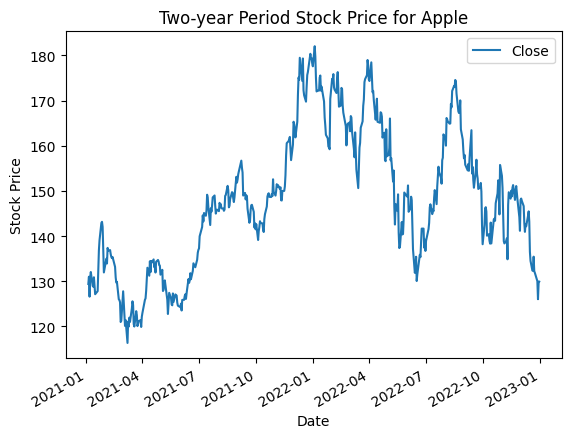

In [147]:
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

# search symbol for Apple Inc. from the original dataframe
results = data['Description'].str.contains('Apple')
apple_symbol = data[results]['Symbol']
for i in apple_symbol:
    # download data for apple
    apple = yf.download(tickers = i, start = '2021-01-01', end = '2022-12-31', interval = '1d')
# create a dataframe for 2021-2022 close price
apple_data = pd.DataFrame(apple[['Close']])
apple_data.insert(loc = 0, column = 'Date', value = apple_data.index)
# specify the x and y values
apple_data.plot(x = 'Date', y = 'Close', kind = 'line')
# create a price curve
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('Two-year Period Stock Price for Apple')
# plot the image
plt.show()

([<matplotlib.patches.Wedge at 0x13bfe5410>,
 [Text(0.817459305728021, 0.7360436695459462, 'Information Technology'),
  Text(-0.3399187231970732, 1.046162158377023, 'Health Care'),
  Text(-1.0049000355222002, 0.4474102352511406, 'Financials'),
  Text(-1.004899951743044, -0.44741042342219545, 'Industrials'),
  Text(-0.3399185272995271, -1.04616222202798, 'Consumer Staples'),
  Text(0.4474104939863377, -1.0048999203258508, 'Consumer Discretionary'),
  Text(0.8899188239641143, -0.6465635983832745, 'Communication Services'),
  Text(1.0461622419188967, -0.3399184660815416, 'Energy'),
  Text(1.0939741111904127, -0.11498105950610689, 'Materials')],
 [Text(0.44588689403346593, 0.40147836520687974, '23%'),
  Text(-0.18541021265294902, 0.5706339045692853, '13%'),
  Text(-0.5481272921030182, 0.2440419465006221, '13%'),
  Text(-0.5481272464052966, -0.2440420491393793, '13%'),
  Text(-0.18541010579974201, -0.5706339392879891, '13%'),
  Text(0.24404208762891144, -0.5481272292686459, '10%'),
  Text(0

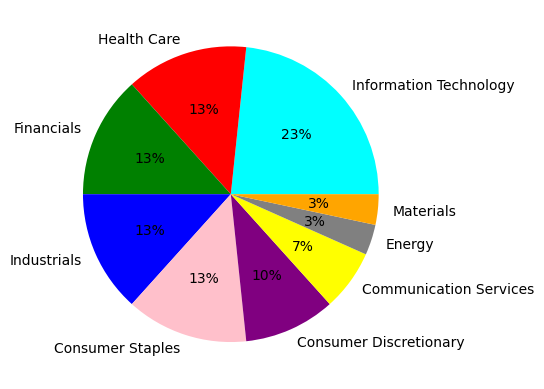

In [206]:
import pandas as pd
import matplotlib.pyplot as plt

# create a new dataframe for GICS Sector and number of each category
GICS_data = pd.DataFrame(df_all['GICS Sector'].value_counts())
GICS_data.insert(loc=0, column='GICS', value=GICS_data.index)

# calculate the percentage
GICS_data['Percentage'] = GICS_data['GICS Sector'] / 30

# create lables and sizes for pies
labels = GICS_data['GICS']
sizes = GICS_data['Percentage']

# color
color_map = {'Energy': 'Grey', 
             'Health Care': 'Red', 
             'Financials': 'Green', 
             'Industrials': 'Blue', 
             'Consumer Discretionary': 'Purple', 
             'Information Technology': 'Aqua', 
             'Consumer Staples': 'Pink', 
             'Materials': 'Orange', 
             'Communication Services': 'Yellow'}

fig, ax = plt.subplots()
ax.pie(sizes, labels = labels, autopct = '%1.0f%%', colors = [color_map[x] for x in labels]) # convert to percentage

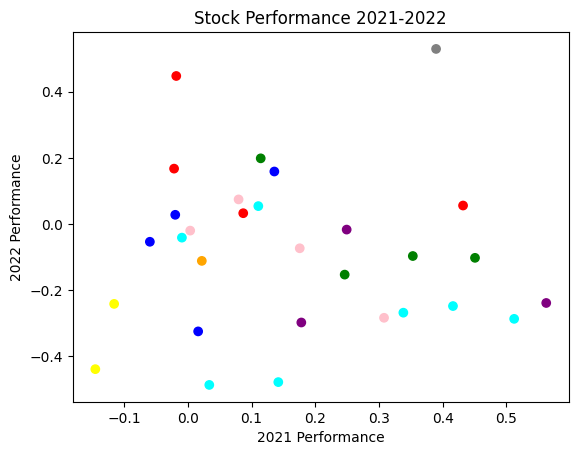

In [214]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# collect data for 2021 and 2022 performance
plot_data = pd.DataFrame(df_all[['Company name', 'GICS Sector', 'Performance 2021', 'Performance 2022']])
X = plot_data['Performance 2021']
Y = plot_data['Performance 2022']

# colored as Q2.2
color_map = {'Energy': 'Grey', 
             'Health Care': 'Red', 
             'Financials': 'Green', 
             'Industrials': 'Blue', 
             'Consumer Discretionary': 'Purple', 
             'Information Technology': 'Aqua', 
             'Consumer Staples': 'Pink', 
             'Materials': 'Orange', 
             'Communication Services': 'Yellow'}
color_list = [color_map[sector] for sector in plot_data['GICS Sector']]


# plot
plt.scatter(X, Y, c = color_list)

# label
plt.xlabel('2021 Performance')
plt.ylabel('2022 Performance')
plt.title('Stock Performance 2021-2022')
plt.show()